# TensorFlow Classification

## Data

https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes

1. Title: Pima Indians Diabetes Database

2. Sources:
   (a) Original owners: National Institute of Diabetes and Digestive and
                        Kidney Diseases
   (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                          Research Center, RMI Group Leader
                          Applied Physics Laboratory
                          The Johns Hopkins University
                          Johns Hopkins Road
                          Laurel, MD 20707
                          (301) 953-6231
   (c) Date received: 9 May 1990

3. Past Usage:
    1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&
       Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
       the onset of diabetes mellitus.  In {\it Proceedings of the Symposium
       on Computer Applications and Medical Care} (pp. 261--265).  IEEE
       Computer Society Press.

       The diagnostic, binary-valued variable investigated is whether the
       patient shows signs of diabetes according to World Health Organization
       criteria (i.e., if the 2 hour post-load plasma glucose was at least 
       200 mg/dl at any survey  examination or if found during routine medical
       care).   The population lives near Phoenix, Arizona, USA.

       Results: Their ADAP algorithm makes a real-valued prediction between
       0 and 1.  This was transformed into a binary decision using a cutoff of 
       0.448.  Using 576 training instances, the sensitivity and specificity
       of their algorithm was 76% on the remaining 192 instances.

4. Relevant Information:
      Several constraints were placed on the selection of these instances from
      a larger database.  In particular, all patients here are females at
      least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
      routine that generates and executes digital analogs of perceptron-like
      devices.  It is a unique algorithm; see the paper for details.

5. Number of Instances: 768

6. Number of Attributes: 8 plus class 

    7. For Each Attribute: (all numeric-valued)
       1. Number of times pregnant
       2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
       3. Diastolic blood pressure (mm Hg)
       4. Triceps skin fold thickness (mm)
       5. 2-Hour serum insulin (mu U/ml)
       6. Body mass index (weight in kg/(height in m)^2)
       7. Diabetes pedigree function
       8. Age (years)
       9. Class variable (0 or 1)

8. Missing Attribute Values: Yes

9. Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")

   Class Value  Number of instances
   0            500
   1            268

10. Brief statistical analysis:

        Attribute number:    Mean:   Standard Deviation:
        1.                     3.8     3.4
        2.                   120.9    32.0
        3.                    69.1    19.4
        4.                    20.5    16.0
        5.                    79.8   115.2
        6.                    32.0     7.9
        7.                     0.5     0.3
        8.                    33.2    11.8

In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

### Clean the Data

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


### Feature Columns

In [8]:
diabetes.columns 

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [9]:
import tensorflow as tf

### Continuous Features

* Number of times pregnant
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Diastolic blood pressure (mm Hg)
* Triceps skin fold thickness (mm)
* 2-Hour serum insulin (mu U/ml)
* Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function

In [10]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

### Categorical Features

If you know the set of all possible feature values of a column and there are only a few of them, you can use categorical_column_with_vocabulary_list. If you don't know the set of possible values in advance you can use categorical_column_with_hash_bucket

In [11]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])
# Alternative
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

### Converting Continuous to Categorical

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

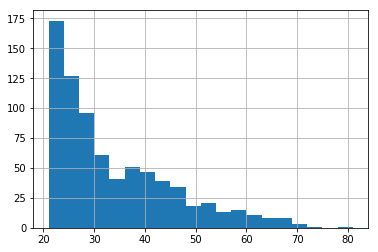

In [13]:
diabetes['Age'].hist(bins=20)

In [14]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

### Putting them together

In [15]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

### Train Test Split

In [16]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [17]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null float64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Group                    768 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 60.1+ KB


In [18]:
x_data = diabetes.drop('Class',axis=1)

In [19]:
labels = diabetes['Class']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33, random_state=101)

### Input Function

In [22]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

### Creating the Model

In [23]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_model_dir': 'C:\\Users\\lenovo\\AppData\\Local\\Temp\\tmpibx4pcfg', '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5}


In [24]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\lenovo\AppData\Local\Temp\tmpibx4pcfg\model.ckpt.
INFO:tensorflow:step = 1, loss = 6.93147
INFO:tensorflow:global_step/sec: 407.733
INFO:tensorflow:step = 101, loss = 5.55396 (0.250 sec)
INFO:tensorflow:global_step/sec: 424.923
INFO:tensorflow:step = 201, loss = 4.32205 (0.234 sec)
INFO:tensorflow:global_step/sec: 415.387
INFO:tensorflow:step = 301, loss = 6.62284 (0.242 sec)
INFO:tensorflow:global_step/sec: 318.145
INFO:tensorflow:step = 401, loss = 3.81759 (0.310 sec)
INFO:tensorflow:global_step/sec: 427.741
INFO:tensorflow:step = 501, loss = 5.45106 (0.238 sec)
INFO:tensorflow:global_step/sec: 420.893
INFO:tensorflow:step = 601, loss = 3.88201 (0.233 sec)
INFO:tensorflow:global_step/sec: 449.996
INFO:tensorflow:step = 701, loss = 6.62318 (0.222 sec)
INFO:tensorflow:global_step/sec: 436.024
INFO:tensorflow:step = 801, loss = 5.58764 (0.236 sec)
INFO:tensorflow:global_step/sec: 413.942
I

In [262]:
# Useful link ofr your own data
# https://stackoverflow.com/questions/44664285/what-are-the-contraints-for-tensorflow-scope-names

## Evaluation

In [25]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [26]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2019-07-12-07:20:13
INFO:tensorflow:Restoring parameters from C:\Users\lenovo\AppData\Local\Temp\tmpibx4pcfg\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2019-07-12-07:20:13
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.720472, accuracy_baseline = 0.65748, auc = 0.784397, auc_precision_recall = 0.624302, average_loss = 0.535719, global_step = 1000, label/mean = 0.34252, loss = 5.23356, prediction/mean = 0.383813


In [27]:
results

{'accuracy': 0.72047246,
 'accuracy_baseline': 0.65748036,
 'auc': 0.78439665,
 'auc_precision_recall': 0.62430215,
 'average_loss': 0.53571862,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.2335587,
 'prediction/mean': 0.38381329}

## Predictions

In [28]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [29]:
# Predictions is a generator! 
predictions = model.predict(pred_input_func)

In [30]:
list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\lenovo\AppData\Local\Temp\tmpibx4pcfg\model.ckpt-1000


[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.54283255], dtype=float32),
  'logits': array([ 0.17175114], dtype=float32),
  'probabilities': array([ 0.45716745,  0.54283255], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.64581376], dtype=float32),
  'logits': array([ 0.60068834], dtype=float32),
  'probabilities': array([ 0.35418624,  0.64581376], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.41230369], dtype=float32),
  'logits': array([-0.35445011], dtype=float32),
  'probabilities': array([ 0.58769631,  0.41230372], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.3344996], dtype=float32),
  'logits': array([-0.68790364], dtype=float32),
  'probabilities': array([ 0.6655004,  0.3344996], dtype=float3

# DNN Classifier

In [31]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_model_dir': 'C:\\Users\\lenovo\\AppData\\Local\\Temp\\tmpmvrz3pql', '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5}


In [32]:
# UH OH! AN ERROR. Check out the video to see why and how to fix.
# https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/feature_column/feature_column.py
dnn_model.train(input_fn=input_func,steps=1000)

ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [33]:
embedded_group_column = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [34]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_column, age_buckets]

In [35]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [36]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_model_dir': 'C:\\Users\\lenovo\\AppData\\Local\\Temp\\tmpyafvl1jz', '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5}


In [37]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\lenovo\AppData\Local\Temp\tmpyafvl1jz\model.ckpt.
INFO:tensorflow:step = 1, loss = 9.1164
INFO:tensorflow:global_step/sec: 393.369
INFO:tensorflow:step = 101, loss = 6.55733 (0.259 sec)
INFO:tensorflow:global_step/sec: 417.237
INFO:tensorflow:step = 201, loss = 5.66217 (0.240 sec)
INFO:tensorflow:global_step/sec: 472.521
INFO:tensorflow:step = 301, loss = 5.51511 (0.212 sec)
INFO:tensorflow:global_step/sec: 478.719
INFO:tensorflow:step = 401, loss = 4.49031 (0.214 sec)
INFO:tensorflow:global_step/sec: 440.465
INFO:tensorflow:step = 501, loss = 1.93674 (0.217 sec)
INFO:tensorflow:global_step/sec: 452.495
INFO:tensorflow:step = 601, loss = 2.90196 (0.221 sec)
INFO:tensorflow:global_step/sec: 464.233
INFO:tensorflow:step = 701, loss = 4.35724 (0.220 sec)
INFO:tensorflow:global_step/sec: 431.637
INFO:tensorflow:step = 801, loss = 2.52686 (0.232 sec)
INFO:tensorflow:global_step/sec: 444.907
IN

In [38]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [39]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2019-07-12-07:26:29
INFO:tensorflow:Restoring parameters from C:\Users\lenovo\AppData\Local\Temp\tmpyafvl1jz\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2019-07-12-07:26:29
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.724409, accuracy_baseline = 0.65748, auc = 0.821254, auc_precision_recall = 0.700885, average_loss = 0.502765, global_step = 1000, label/mean = 0.34252, loss = 4.91163, prediction/mean = 0.370371


{'accuracy': 0.72440946,
 'accuracy_baseline': 0.65748036,
 'auc': 0.82125396,
 'auc_precision_recall': 0.70088518,
 'average_loss': 0.50276482,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 4.9116254,
 'prediction/mean': 0.37037063}

# Great Job!